In [63]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import common
import vcm
import fv3viz

In [2]:
group = "zc-emu-diagnostic-update-30d-v3-offline"

In [3]:
data_2d, data_3d = common.open_group(group)

/home/andrep/repos/fv3net/workflows/diagnostics/fv3net/diagnostics/prognostic_run/load_run_data.py:122: UserWarning: gs://vcm-ml-experiments/microphysics-emulation/2022-11-23/zc-emu-diagnostic-update-30d-v3-offline/diags_3d.zarr not found. Returning empty dataset.
  warnings.warn(UserWarning(f"{path} not found. Returning empty dataset."))
/home/andrep/repos/fv3net/workflows/diagnostics/fv3net/diagnostics/prognostic_run/load_run_data.py:122: UserWarning: gs://vcm-ml-experiments/microphysics-emulation/2022-11-23/zc-emu-diagnostic-update-30d-v3-offline/nudging_tendencies.zarr not found. Returning empty dataset.
  warnings.warn(UserWarning(f"{path} not found. Returning empty dataset."))
/home/andrep/repos/fv3net/workflows/diagnostics/fv3net/diagnostics/prognostic_run/load_run_data.py:122: UserWarning: gs://vcm-ml-experiments/microphysics-emulation/2022-11-23/zc-emu-diagnostic-update-30d-v3-offline/diags.zarr not found. Returning empty dataset.
  warnings.warn(UserWarning(f"{path} not found

In [ ]:
# Take meridional transects of ...
# gscond physics cloud
# precpd physics cloud
# precpd physics humidity

# Pick a a time with a good mix of convection and or frontal activity
# Transect over ocean

In [4]:
print(list(data_2d.keys()))

['area', 'lat', 'latb', 'lon', 'lonb', 'land_sea_mask', 'PRESsfc', 'PRMSL', 'PWAT', 'RH1000', 'RH500', 'RH700', 'RH850', 'RH925', 'TMP200', 'TMP500', 'TMP500_300', 'TMP850', 'TMPlowest', 'UGRD200', 'UGRD50', 'UGRD500', 'UGRD850', 'UGRDlowest', 'VGRD200', 'VGRD50', 'VGRD500', 'VGRD850', 'VGRDlowest', 'VIL', 'VORT200', 'VORT500', 'VORT850', 'h200', 'h500', 'h850', 'iw', 'kinetic_energy', 'q1000', 'q500', 'q700', 'q850', 'q925', 'total_energy', 'w200', 'w500', 'w850', 'CPRATsfc', 'DLWRFsfc', 'DPT2m', 'DSWRFsfc', 'DSWRFtoa', 'GRAUPELsfc', 'HPBLsfc', 'ICECsfc', 'ICEsfc', 'LHTFLsfc', 'MAXWIND10m', 'PRATEsfc', 'SHTFLsfc', 'SLMSKsfc', 'SNOWsfc', 'SOILM', 'SOILT1', 'SOILT2', 'SOILT3', 'SOILT4', 'SPFH2m', 'TMAX2m', 'TMP2m', 'TMPsfc', 'UGRD10m', 'ULWRFsfc', 'ULWRFtoa', 'USWRFsfc', 'USWRFtoa', 'VGRD10m', 'uflx', 'vflx']


(<Figure size 432x288 with 1 Axes>,
 array(<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f9d283385b0>,
       dtype=object),
 None)

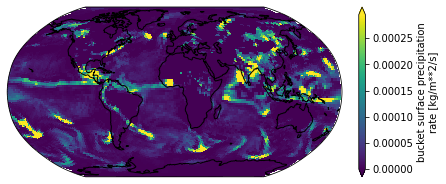

In [5]:
fv3viz.plot_cube(data_2d.isel(time=16), "PRATEsfc")

In [11]:
data_3d_transect = common.meridional_transect(data_3d, 260)

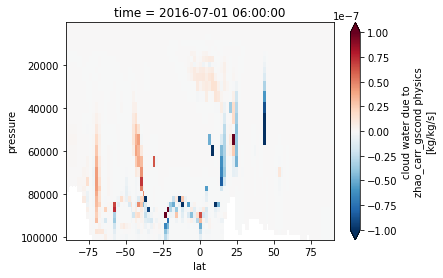

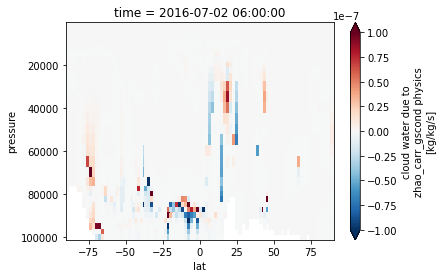

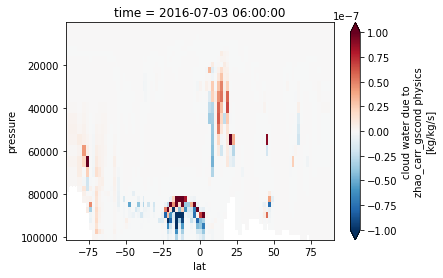

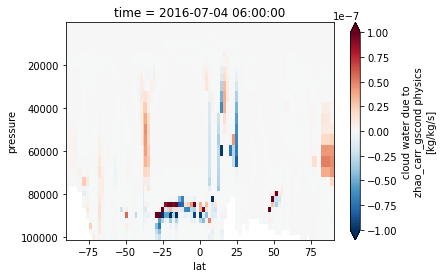

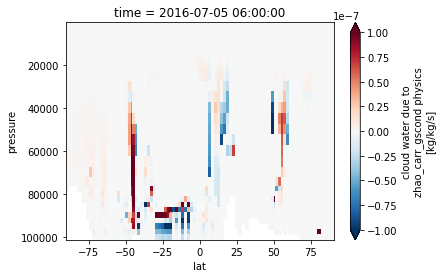

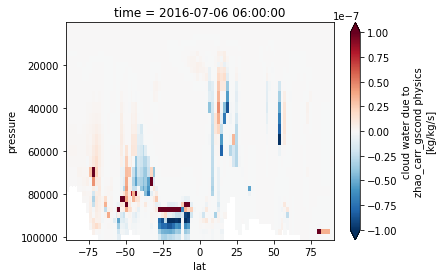

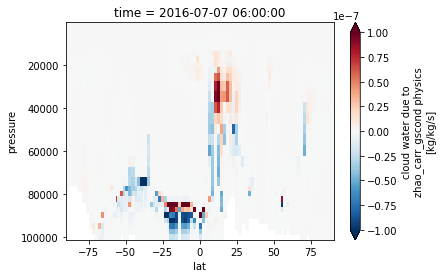

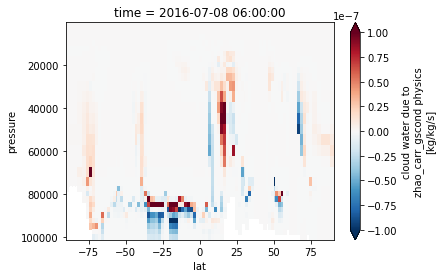

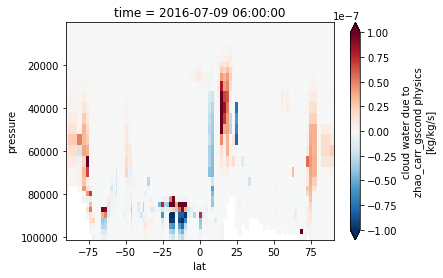

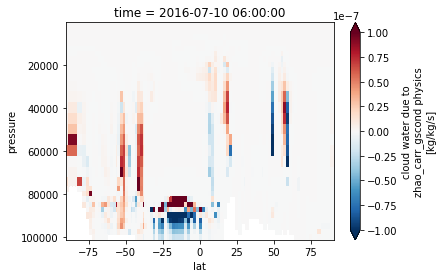

In [20]:
for i in range(10):
    data_3d_transect["tendency_of_cloud_water_due_to_gscond_physics"].isel(time=(i*8)+1).plot(vmin=-1e-7, vmax=1e-7, cmap="RdBu_r", yincrease=False)
    plt.show()

In [30]:
seconds_per_day = 60 * 60 * 24
g_per_kg = 1000

In [29]:
# select July 11 @ 6Z
for_plot = data_3d_transect.isel(time=81)

# colormap for land
rdbu = plt.cm.get_cmap("RdBu_r")
rdbu.set_bad(color="#bcb3a2")

# adjustments


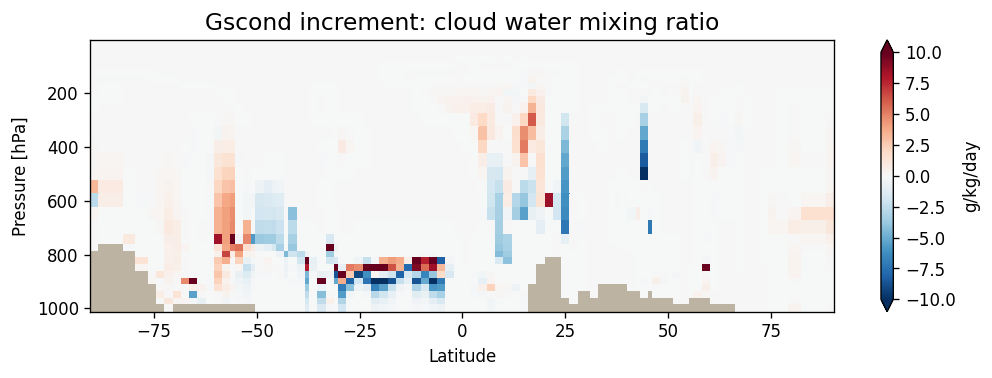

In [43]:
gscond_dcloud = for_plot["tendency_of_cloud_water_due_to_gscond_physics"] * g_per_kg * seconds_per_day
gscond_dcloud["pressure"] = gscond_dcloud["pressure"] / 100

plt.figure(dpi=120, figsize=(10, 3))
gscond_dcloud.plot(vmin=-10, vmax=10, cmap=rdbu, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Gscond increment: cloud water mixing ratio", size=14)
plt.show()

In [74]:
tmp = mpl.cm.get_cmap("Reds")(np.linspace(0,1,8))
tmp[0] = [1., 1., 1., 1.]
nu_reds = mpl.colors.LinearSegmentedColormap.from_list("nu_red", tmp)
nu_reds.set_bad(color="#bcb3a2")

tmp = mpl.cm.get_cmap("Blues_r")(np.linspace(0,1,8))
tmp[-1] = [1., 1., 1., 1.]
nu_blues = mpl.colors.LinearSegmentedColormap.from_list("nu_blue", tmp)
nu_blues.set_bad(color="#bcb3a2")

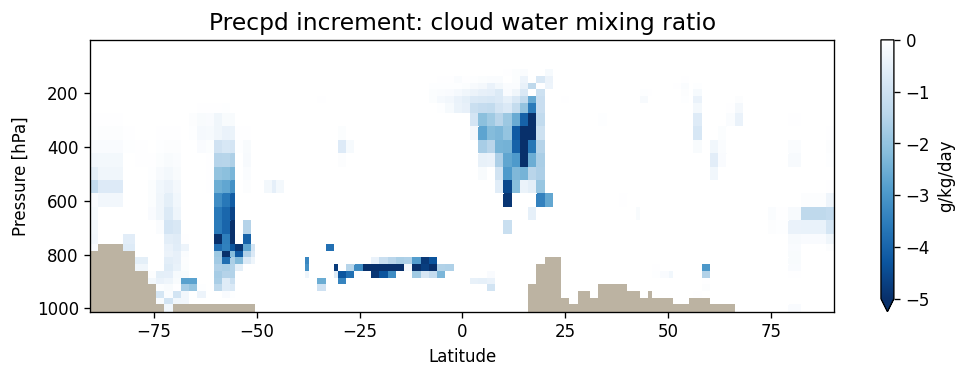

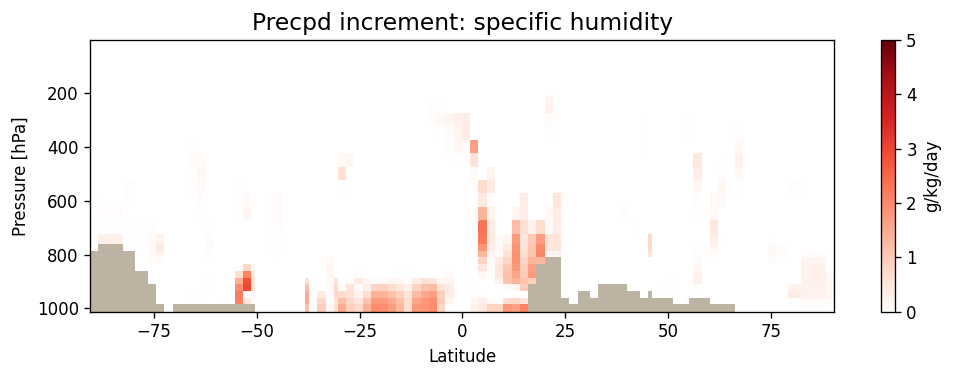

In [75]:
precpd_dcloud = for_plot["tendency_of_cloud_water_due_to_zhao_carr_physics"] - for_plot["tendency_of_cloud_water_due_to_gscond_physics"]
precpd_dcloud *= g_per_kg * seconds_per_day
precpd_dcloud["pressure"] = precpd_dcloud["pressure"] / 100

precpd_dhumidity = for_plot["tendency_of_specific_humidity_due_to_zhao_carr_physics"] - for_plot["tendency_of_specific_humidity_due_to_gscond_physics"]
precpd_dhumidity *= g_per_kg * seconds_per_day
precpd_dhumidity["pressure"] = precpd_dhumidity["pressure"] / 100

plt.figure(dpi=120, figsize=(10, 3))
precpd_dcloud.plot(vmin=-5, vmax=0, cmap=nu_blues, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd increment: cloud water mixing ratio", size=14)
plt.show()

plt.figure(dpi=120, figsize=(10, 3))
precpd_dhumidity.plot(vmin=0, vmax=5, cmap=nu_reds, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd increment: specific humidity", size=14)
plt.show()